# <center>BUILD A LOGISTIC REGRESSION CLASSIFIER AND ESTIMATING ERROR USING LOOCV METHOD</center>

### Question 7. In Sections 5.3.2 and 5.3.3, we saw that the cv.glm() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the glm() and predict.glm() functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).
#### (a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.
#### (b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.
#### (c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P ( Direction = "Up"| Lag1, Lag2 ) > 0.5. Was this observation correctly classified?
#### (d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:
    i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
    ii. Compute the posterior probability of the market moving up for the ith observation.
    iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
    iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.
#### (e) Take the average of the n numbers obtained in (d) iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

# --------------------------------------------------------------------

### Understanding the Dataset: A data frame with 1089 observations on the following 9 variables.

Year

    The year that the observation was recorded
Lag1

    Percentage return for previous week
Lag2

    Percentage return for 2 weeks previous
Lag3

    Percentage return for 3 weeks previous
Lag4

    Percentage return for 4 weeks previous
Lag5

    Percentage return for 5 weeks previous
Volume

    Volume of shares traded (average number of daily shares traded in billions)
Today

    Percentage return for this week
Direction

    A factor with levels Down and Up indicating whether the market had a positive or negative return on a given week


### 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab as pl

### 2. Loading the Weekly Dataset

In [2]:
weekly_data = pd.read_csv("Weekly.csv")
weekly_data['Direction'] = weekly_data['Direction'].map({'Up' : 1, 'Down':0})
weekly_data = weekly_data.drop(['Year','Lag3','Lag4','Lag5','Volume','Today'],axis=1)

* #### Replacing Up with 1 and Down with 0 in Direction column.
* #### We also dropped columns such as 'Year', 'Lag3', 'Lag4', 'Lag5', and 'Volume' as we won't be needing this columns for our model as this question requires only Direction, Lag1 and Lag2.

### 3. First 5 values of weekly_data

In [3]:
weekly_data.head()

,Lag1,Lag2,Direction
0,0.816,1.572,0
1,-0.270,0.816,0
2,-2.576,-0.270,1
3,3.514,-2.576,1
4,0.712,3.514,1


### 5. Columns in Weekly Dataset
* These helps us in understanding the columns we are dealing with.

In [4]:
weekly_data.columns

Index(['Lag1', 'Lag2', 'Direction'], dtype='object')

### 6. Checking for missing Values

In [5]:
weekly_data.isnull().sum()

Lag1         0
Lag2         0
Direction    0
dtype: int64

#### There are no missing values in the Dataset

### 7. Shape of Weekly Data

In [6]:
weekly_data.shape

(1089, 3)

### 8. Descriptive Statistics of Weekly Data

#### 8.1 - Data type of all the variables in the Dataset

In [7]:
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lag1       1089 non-null   float64
 1   Lag2       1089 non-null   float64
 2   Direction  1089 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 25.6 KB


__We have all the Quantitative values in the Dataset__

#### 8.2 Describe()

* This funtion allows us to observe the Count, Mean, Standard Deviation, Minimum value, Maximum Value, Quantile values

In [8]:
weekly_data.describe()

,Lag1,Lag2,Direction
count,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.555556
std,2.357013,2.357254,0.497132
min,-18.195000,-18.195000,0.000000
25%,-1.154000,-1.154000,0.000000
50%,0.241000,0.241000,1.000000
75%,1.405000,1.409000,1.000000
max,12.026000,12.026000,1.000000


* #### The mean of Lag1 is 0.150585 and mean of Lag2 is 0.151079.
* #### Standard Deviation of Lag1 and Lag2 is 2.357013 and 2.357254 respectively.
* #### Minimum value of Lag1 is -18.195 and Minimum Lag2 is -18.195
* #### Maximum Lag1 is 12.02600 and Maximum Lag2 is 12.02600.

### 9. Correlation in the Dataset

In [9]:
weekly_data.corr()

,Lag1,Lag2,Direction
Lag1,1.000000,-0.074853,-0.050004
Lag2,-0.074853,1.000000,0.072696
Direction,-0.050004,0.072696,1.000000


### 9.1 Heatmap for Correlation Values

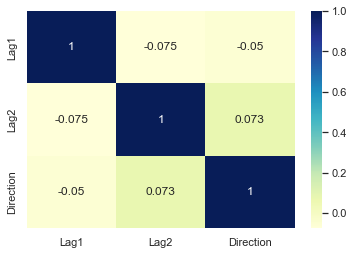

In [10]:
sns.set(rc={'figure.figsize' : (6,4)})
sns.heatmap(weekly_data.corr(), cmap="YlGnBu", annot=True)
plt.show();

__From the values we can observe that there isn't much correlation between the Dataset__

### 9.2 Pairplot to observe Correlation

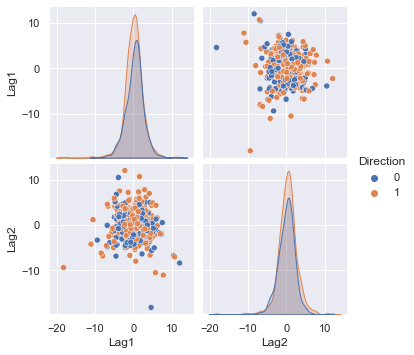

In [11]:
sns.set(rc={'figure.figsize' : (6,4)})
sns.pairplot(weekly_data, hue='Direction')
plt.show();

__In this Pair Plot if we look closely we can see that the data points are evenly distributed in both Lag1 and Lag2 which means there isn't clear evidence about in which conditions moves Up or Down.__

### 9.3 Box Plot of Lag 1 vs Lag2 and Direction

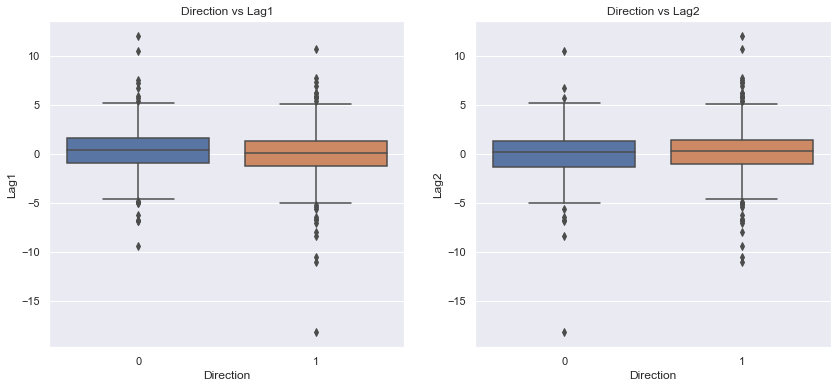

In [12]:
sns.set(rc={'figure.figsize': (14,6)})
fig, axs = plt.subplots(1, 2)
plt.subplot(1,2,1)
sns.boxplot(data=weekly_data,x="Direction",y='Lag1')
plt.title("Direction vs Lag1")
plt.subplot(1,2,2)
sns.boxplot(data=weekly_data,x="Direction",y='Lag2')
plt.title("Direction vs Lag2")
plt.show();

* #### There are outliers present in both Direction vs Lag1 and Direction vs Lag2 plot.
* #### As observed from the pairplot, box plot indicates the same observation that Both of this features are evenly spreaded over the direction variable. This can help us train our model to the accurate values and see how it performs while classifying.

### 9.4 Scatter plot of Lag1 vs Lag2

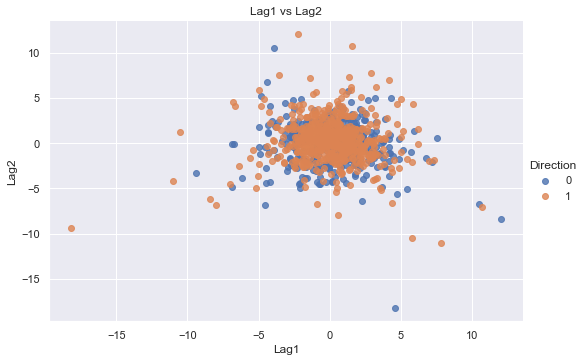

In [13]:
sns.lmplot(x='Lag1', y='Lag2', hue='Direction',data=weekly_data, aspect=1.5, fit_reg=False)
plt.title("Lag1 vs Lag2")
plt.show();

__In this scatter plot we can observe that the spread of both Lag1 and Lag22 is almost same. It is crucial to know what leads the stock market to move Up or Down based on the percentage return for previous week(Lag1) and previous 2 week(Lag2).__  

### 9. There are two types of direction in the weekly dataset
* Direction is our Response Variable.
* It contains two values ['Down', 'Up']
* Up : 1 and Down : 0

In [14]:
weekly_data['Direction'].unique()

array([0, 1], dtype=int64)

### 10. Observe the Number of times the  `Direction` went Up or Down

In [15]:
weekly_data.groupby('Direction').size()

Direction
0    484
1    605
dtype: int64

__We can observe that Direction has 484 rows with value `Down` and 605 rows with value `Up`__

### 10.1 Countplot to observe the data

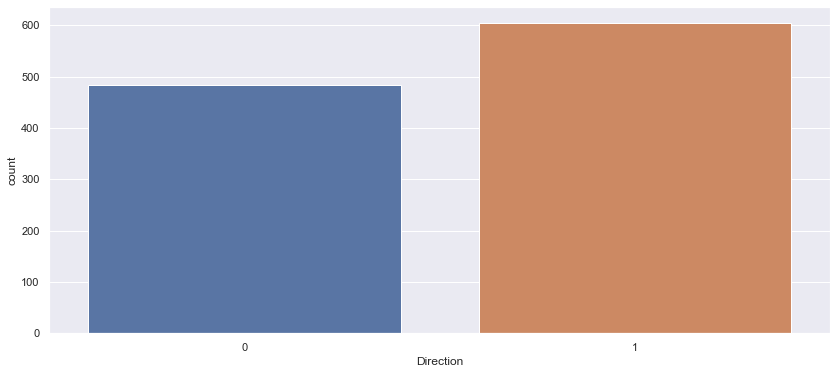

In [16]:
sns.countplot(x='Direction', data = weekly_data ,label='Count')
plt.show();

* #### Number of times the Direction went Up = 605
* #### Number of times the Direction went Down = 484

### 11. Logistic Regresion Model

In [17]:
weekly_data.columns

Index(['Lag1', 'Lag2', 'Direction'], dtype='object')

### 11.1 Fitting the Logistic Regression Model

In [18]:
from statsmodels.formula.api import logit

In [19]:
weekly_model = logit("Direction ~ Lag1 + Lag2",weekly_data).fit()

Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4


In [20]:
print(weekly_model.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                0.005335
Time:                        16:55:42   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
Lag2           0.0602      0.027      2.270      0.0

__Lag 2 is significant associated with Direction. We can say that by considering the p-Value for Lag2 column. Let's try to observe our model using a Confusion Matrix. Confusion Matrix will help us understand our model better.__

### 11.2 Predicting Direction column based on our Model

In [21]:
weekly_data['Direction_pred'] = weekly_model.predict(weekly_data[['Lag1','Lag2']])
weekly_data.head()

,Lag1,Lag2,Direction,Direction_pred
0,0.816,1.572,0,0.570609
1,-0.270,0.816,0,0.569753
2,-2.576,-0.270,1,0.575592
3,3.514,-2.576,1,0.482496
4,0.712,3.514,1,0.599976


### 11.3 We will set our Posterior probability cuttoff = 0.5 and optimize the Direction_pred column

In [22]:
weekly_data['Direction_pred'] = weekly_data['Direction_pred'].apply(lambda x: 1 if x>0.5 else 0)
y_pred = weekly_data['Direction_pred']

### 11.4 Confusion Matrix : Confusion matrix tells more about the accuracy of our model and has 4 very important metric count.
* True negatives in the upper-left position.
* False negatives in the lower-left position.
* False positives in the upper-right position.
* True positives in the lower-right position.

In [23]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(weekly_data['Direction'],y_pred)
print(conf_matrix)
print("True Negative :",conf_matrix[0,0])
print("True Positive :",conf_matrix[1,1])
print("False Positive :",conf_matrix[0,1])
print("False Negative :",conf_matrix[1,0])

[[ 38 446]
 [ 38 567]]
True Negative : 38
True Positive : 567
False Positive : 446
False Negative : 38


* True Negative value of 38 suggests that around 38 times real value said the __Percentage Return would move Down__ and value predicted by model also said __Percentage Return would move Down__.
* True Positive value of 567 says that around 567 times real value said __Percentage Return would move UP__ and value predicted by model also said __Percentage Return would move UP__.
* False positive value of 446 means when model predicted the __Percentage Return would move DOWN__ but in real the __Percentage Return moved UP__.
* False negative value of 38 means when model predicted __Percentage Return would move UP__ but in real __Percentage Return moved Down__.

### 11.4.1 Heatmap of Percentage of Data in each quadrant

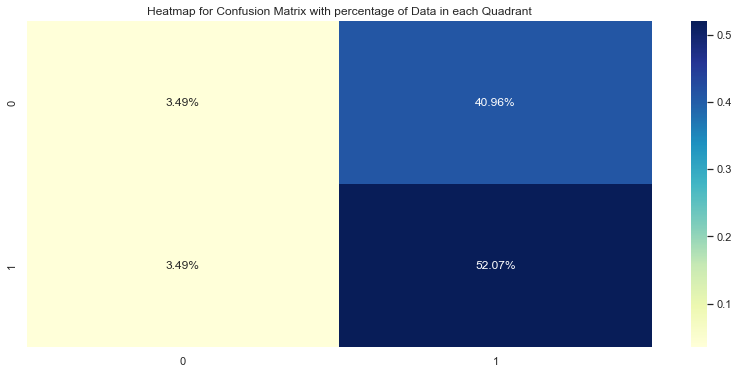

In [24]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%',cmap='YlGnBu')
plt.title("Heatmap for Confusion Matrix with percentage of Data in each Quadrant")
plt.show();

### 12. Misclassification Rate
* It tells you what fraction of predictions were incorrect. It's also called Classification Error.
* Misclassification Rate(MR) is given by :

$$ MR = \frac{(False Positive + False Negative)}{(True Positive + True negative + False Positive + False Negative)}$$

In [25]:
misclassification_Rate = (conf_matrix[0,1] + conf_matrix[1,0])/(conf_matrix[0,0] + conf_matrix[1,1] + conf_matrix[0,1] + conf_matrix[1,0])
print("Misclassification Rate using Validation Test Approach is : {:.2f} %".format(misclassification_Rate*100))

Misclassification Rate using Validation Test Approach is : 44.44 %


__We can see that our model has a Misclassification Rate of 44.44%. Around 40.96% where the model predicted that percentage return would move Down but in real the percentage return went UP. Our model was unable to classify around 40% of the data points where the percentage return actually went UP.__

### 13. Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [26]:
weekData = weekly_data.copy()
weekData = weekData.drop('Direction_pred', axis=1)

### 13.1 Leaving out the First Observation for fitting the Logistic Regression Model

In [27]:
X = weekData.iloc[1:len(weekData),:]
y = weekData.iloc[0:1,:]

In [28]:
X.head()

,Lag1,Lag2,Direction
1,-0.270,0.816,0
2,-2.576,-0.270,1
3,3.514,-2.576,1
4,0.712,3.514,1
5,1.178,0.712,0


In [29]:
y

,Lag1,Lag2,Direction
0,0.816,1.572,0



### 13.2 Fitting the Logistic Regression Model

In [30]:
weekModel = logit("Direction ~ Lag1 + Lag2",X).fit()

Optimization terminated successfully.
         Current function value: 0.683147
         Iterations 4


In [31]:
print(weekModel.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                0.005387
Time:                        16:55:42   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
Covariance Type:            nonrobust   LLR p-value:                   0.01785
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
Lag2           0.0608      0.027      2.291      0.0

__Now that we have trained our model based on all of the observations except the first one. Let's try to predict the Direction of our first observation using the above model and see if we can correctly classify the first observation.__

### 13.3 Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P ( Direction = "Up"| Lag1, Lag2 ) > 0.5. Was this observation correctly classified?

In [32]:
y['Direction_pred'] = weekModel.predict(y[['Lag1','Lag2']])

In [33]:
y['Direction_pred'] = y['Direction_pred'].apply(lambda x: 1 if x > 0.5 else 0)
print(y)

    Lag1   Lag2  Direction  Direction_pred
0  0.816  1.572          0               1


__The Direction is Not Correctly Classified as the original Direction trend is going DOWN but the trend predicted by the model says the trend is going UP.__

### 14. Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:
(i.) Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
    
(ii.) Compute the posterior probability of the market moving up for the ith observation.

(iii.) Use the posterior probability for the ith observation in order to predict whether or not the market moves up.

(iv.) Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

### 14.1 For loop 

In [56]:
error=[]
for i in range(1,len(weekData)):
    X = weekData.copy()
    X = X.drop(X.index[i])
    y = weekData.iloc[[i]]
        
    model = logit("Direction ~ Lag1 + Lag2",X).fit()
    y['Direction_pred'] = model.predict(y[['Lag1','Lag2']])
    y['Direction_pred'] = y['Direction_pred'].apply(lambda x: 1 if x > 0.5 else 0)
    error.append(y['Direction']==y['Direction_pred'])
    print(i)
    

Optimization terminated successfully.
         Current function value: 0.683149
         Iterations 4
1
Optimization terminated successfully.
         Current function value: 0.683416
         Iterations 4
2
Optimization terminated successfully.
         Current function value: 0.683253
         Iterations 4
3
Optimization terminated successfully.
         Current function value: 0.683454
         Iterations 4
4
Optimization terminated successfully.
         Current function value: 0.683181
         Iterations 4
5
Optimization terminated successfully.
         Current function value: 0.683432
         Iterations 4
6
Optimization terminated successfully.
         Current function value: 0.683335
         Iterations 4
7
Optimization terminated successfully.
         Current function value: 0.683402
         Iterations 4
8
Optimization terminated successfully.
         Current function value: 0.683203
         Iterations 4
9
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: 0.683137
         Iterations 4
82
Optimization terminated successfully.
         Current function value: 0.683366
         Iterations 4
83
Optimization terminated successfully.
         Current function value: 0.683244
         Iterations 4
84
Optimization terminated successfully.
         Current function value: 0.683134
         Iterations 4
85
Optimization terminated successfully.
         Current function value: 0.683389
         Iterations 4
86
Optimization terminated successfully.
         Current function value: 0.683352
         Iterations 4
87
Optimization terminated successfully.
         Current function value: 0.683234
         Iterations 4
88
Optimization terminated successfully.
         Current function value: 0.683480
         Iterations 4
89
Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4
90
Optimization terminated successfully.
         Current 

166
Optimization terminated successfully.
         Current function value: 0.683460
         Iterations 4
167
Optimization terminated successfully.
         Current function value: 0.683302
         Iterations 4
168
Optimization terminated successfully.
         Current function value: 0.683167
         Iterations 4
169
Optimization terminated successfully.
         Current function value: 0.683405
         Iterations 4
170
Optimization terminated successfully.
         Current function value: 0.683344
         Iterations 4
171
Optimization terminated successfully.
         Current function value: 0.683155
         Iterations 4
172
Optimization terminated successfully.
         Current function value: 0.683149
         Iterations 4
173
Optimization terminated successfully.
         Current function value: 0.683168
         Iterations 4
174
Optimization terminated successfully.
         Current function value: 0.683381
         Iterations 4
175
Optimization terminated successfully.
    

244
Optimization terminated successfully.
         Current function value: 0.683468
         Iterations 4
245
Optimization terminated successfully.
         Current function value: 0.683243
         Iterations 4
246
Optimization terminated successfully.
         Current function value: 0.683464
         Iterations 4
247
Optimization terminated successfully.
         Current function value: 0.683252
         Iterations 4
248
Optimization terminated successfully.
         Current function value: 0.683176
         Iterations 4
249
Optimization terminated successfully.
         Current function value: 0.683409
         Iterations 4
250
Optimization terminated successfully.
         Current function value: 0.683243
         Iterations 4
251
Optimization terminated successfully.
         Current function value: 0.683410
         Iterations 4
252
Optimization terminated successfully.
         Current function value: 0.683302
         Iterations 4
253
Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: 0.683127
         Iterations 4
328
Optimization terminated successfully.
         Current function value: 0.683438
         Iterations 4
329
Optimization terminated successfully.
         Current function value: 0.683233
         Iterations 4
330
Optimization terminated successfully.
         Current function value: 0.683416
         Iterations 4
331
Optimization terminated successfully.
         Current function value: 0.683353
         Iterations 4
332
Optimization terminated successfully.
         Current function value: 0.683187
         Iterations 4
333
Optimization terminated successfully.
         Current function value: 0.683122
         Iterations 4
334
Optimization terminated successfully.
         Current function value: 0.683205
         Iterations 4
335
Optimization terminated successfully.
         Current function value: 0.683209
         Iterations 4
336
Optimization terminated successfully.
        

405
Optimization terminated successfully.
         Current function value: 0.683248
         Iterations 4
406
Optimization terminated successfully.
         Current function value: 0.683480
         Iterations 4
407
Optimization terminated successfully.
         Current function value: 0.683259
         Iterations 4
408
Optimization terminated successfully.
         Current function value: 0.683015
         Iterations 4
409
Optimization terminated successfully.
         Current function value: 0.683257
         Iterations 4
410
Optimization terminated successfully.
         Current function value: 0.683383
         Iterations 4
411
Optimization terminated successfully.
         Current function value: 0.683288
         Iterations 4
412
Optimization terminated successfully.
         Current function value: 0.683539
         Iterations 4
413
Optimization terminated successfully.
         Current function value: 0.683378
         Iterations 4
414
Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: 0.683322
         Iterations 4
488
Optimization terminated successfully.
         Current function value: 0.683498
         Iterations 4
489
Optimization terminated successfully.
         Current function value: 0.683224
         Iterations 4
490
Optimization terminated successfully.
         Current function value: 0.683499
         Iterations 4
491
Optimization terminated successfully.
         Current function value: 0.683175
         Iterations 4
492
Optimization terminated successfully.
         Current function value: 0.683051
         Iterations 4
493
Optimization terminated successfully.
         Current function value: 0.683267
         Iterations 4
494
Optimization terminated successfully.
         Current function value: 0.683365
         Iterations 4
495
Optimization terminated successfully.
         Current function value: 0.683292
         Iterations 4
496
Optimization terminated successfully.
        

Optimization terminated successfully.
         Current function value: 0.683315
         Iterations 4
570
Optimization terminated successfully.
         Current function value: 0.683393
         Iterations 4
571
Optimization terminated successfully.
         Current function value: 0.683141
         Iterations 4
572
Optimization terminated successfully.
         Current function value: 0.683143
         Iterations 4
573
Optimization terminated successfully.
         Current function value: 0.683140
         Iterations 4
574
Optimization terminated successfully.
         Current function value: 0.683237
         Iterations 4
575
Optimization terminated successfully.
         Current function value: 0.683123
         Iterations 4
576
Optimization terminated successfully.
         Current function value: 0.683286
         Iterations 4
577
Optimization terminated successfully.
         Current function value: 0.683207
         Iterations 4
578
Optimization terminated successfully.
        

653
Optimization terminated successfully.
         Current function value: 0.683083
         Iterations 4
654
Optimization terminated successfully.
         Current function value: 0.683211
         Iterations 4
655
Optimization terminated successfully.
         Current function value: 0.683243
         Iterations 4
656
Optimization terminated successfully.
         Current function value: 0.683089
         Iterations 4
657
Optimization terminated successfully.
         Current function value: 0.683283
         Iterations 4
658
Optimization terminated successfully.
         Current function value: 0.683381
         Iterations 4
659
Optimization terminated successfully.
         Current function value: 0.683217
         Iterations 4
660
Optimization terminated successfully.
         Current function value: 0.683394
         Iterations 4
661
Optimization terminated successfully.
         Current function value: 0.683493
         Iterations 4
662
Optimization terminated successfully.
    

731
Optimization terminated successfully.
         Current function value: 0.683379
         Iterations 4
732
Optimization terminated successfully.
         Current function value: 0.683198
         Iterations 4
733
Optimization terminated successfully.
         Current function value: 0.683081
         Iterations 4
734
Optimization terminated successfully.
         Current function value: 0.683254
         Iterations 4
735
Optimization terminated successfully.
         Current function value: 0.683362
         Iterations 4
736
Optimization terminated successfully.
         Current function value: 0.683242
         Iterations 4
737
Optimization terminated successfully.
         Current function value: 0.683077
         Iterations 4
738
Optimization terminated successfully.
         Current function value: 0.683385
         Iterations 4
739
Optimization terminated successfully.
         Current function value: 0.683203
         Iterations 4
740
Optimization terminated successfully.
    

815
Optimization terminated successfully.
         Current function value: 0.683088
         Iterations 4
816
Optimization terminated successfully.
         Current function value: 0.683244
         Iterations 4
817
Optimization terminated successfully.
         Current function value: 0.683373
         Iterations 4
818
Optimization terminated successfully.
         Current function value: 0.683342
         Iterations 4
819
Optimization terminated successfully.
         Current function value: 0.683394
         Iterations 4
820
Optimization terminated successfully.
         Current function value: 0.683408
         Iterations 4
821
Optimization terminated successfully.
         Current function value: 0.683395
         Iterations 4
822
Optimization terminated successfully.
         Current function value: 0.683177
         Iterations 4
823
Optimization terminated successfully.
         Current function value: 0.683124
         Iterations 4
824
Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: 0.683402
         Iterations 4
899
Optimization terminated successfully.
         Current function value: 0.683201
         Iterations 4
900
Optimization terminated successfully.
         Current function value: 0.683417
         Iterations 4
901
Optimization terminated successfully.
         Current function value: 0.683220
         Iterations 4
902
Optimization terminated successfully.
         Current function value: 0.683444
         Iterations 4
903
Optimization terminated successfully.
         Current function value: 0.683266
         Iterations 4
904
Optimization terminated successfully.
         Current function value: 0.683452
         Iterations 4
905
Optimization terminated successfully.
         Current function value: 0.683332
         Iterations 4
906
Optimization terminated successfully.
         Current function value: 0.683355
         Iterations 4
907
Optimization terminated successfully.
        

986
Optimization terminated successfully.
         Current function value: 0.683222
         Iterations 4
987
Optimization terminated successfully.
         Current function value: 0.683270
         Iterations 4
988
Optimization terminated successfully.
         Current function value: 0.683341
         Iterations 4
989
Optimization terminated successfully.
         Current function value: 0.683296
         Iterations 4
990
Optimization terminated successfully.
         Current function value: 0.682891
         Iterations 4
991
Optimization terminated successfully.
         Current function value: 0.683184
         Iterations 4
992
Optimization terminated successfully.
         Current function value: 0.683289
         Iterations 4
993
Optimization terminated successfully.
         Current function value: 0.683378
         Iterations 4
994
Optimization terminated successfully.
         Current function value: 0.682939
         Iterations 4
995
Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: 0.683303
         Iterations 4
1072
Optimization terminated successfully.
         Current function value: 0.683463
         Iterations 4
1073
Optimization terminated successfully.
         Current function value: 0.683372
         Iterations 4
1074
Optimization terminated successfully.
         Current function value: 0.683175
         Iterations 4
1075
Optimization terminated successfully.
         Current function value: 0.683435
         Iterations 4
1076
Optimization terminated successfully.
         Current function value: 0.683351
         Iterations 4
1077
Optimization terminated successfully.
         Current function value: 0.683408
         Iterations 4
1078
Optimization terminated successfully.
         Current function value: 0.683397
         Iterations 4
1079
Optimization terminated successfully.
         Current function value: 0.683397
         Iterations 4
1080
Optimization terminated successfully.

### 14.2 Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [57]:
error

[1    False
 dtype: bool,
 2    True
 dtype: bool,
 3    False
 dtype: bool,
 4    True
 dtype: bool,
 5    False
 dtype: bool,
 6    True
 dtype: bool,
 7    True
 dtype: bool,
 8    True
 dtype: bool,
 9    False
 dtype: bool,
 10    False
 dtype: bool,
 11    True
 dtype: bool,
 12    False
 dtype: bool,
 13    True
 dtype: bool,
 14    False
 dtype: bool,
 15    True
 dtype: bool,
 16    False
 dtype: bool,
 17    True
 dtype: bool,
 18    False
 dtype: bool,
 19    True
 dtype: bool,
 20    True
 dtype: bool,
 21    True
 dtype: bool,
 22    False
 dtype: bool,
 23    False
 dtype: bool,
 24    False
 dtype: bool,
 25    False
 dtype: bool,
 26    False
 dtype: bool,
 27    False
 dtype: bool,
 28    True
 dtype: bool,
 29    False
 dtype: bool,
 30    False
 dtype: bool,
 31    False
 dtype: bool,
 32    False
 dtype: bool,
 33    True
 dtype: bool,
 34    False
 dtype: bool,
 35    True
 dtype: bool,
 36    True
 dtype: bool,
 37    True
 dtype: bool,
 38    False
 dtype: bool,


### 14.3 For loop to estimate Number of times the prediction was wrong and error was made

In [73]:
count = 0
for i in range(len(error)):
    if error[i].bool() == False:
        count += 1

### 15. Take the average of the n numbers obtained in (d) (14) iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [75]:
print("The LOOCV estimate for the Error is {}".format(count/len(error)))

The LOOCV estimate for the Error is 0.4494485294117647


### 16. Conclusion

### In conclusion we can say that Model does a bad job in predicting the market trend. Model is able to classify Upward Trend and Downward trend only on 50% -55 % of the data points which suggests that this model can be risky in terms of predicting Upward Trend. Also the association between predictor variable and target variable is also quite low. For now, this model has a misclassification rate of around 45%. 